In [1]:
from tensorflow import keras
from keras import layers
from pathlib import Path
import tensorflow as tf
import tensorflow_addons as tfa
import numpy as np
import json
from matplotlib import pyplot as plt
from collections import OrderedDict, Counter
from tag_fixer import fix_tags as fix_bioes_sequence


In [2]:

INFO_TAG = "english_paragraph"

DATADIR = Path(f"../../data/segmenter_corpus/{INFO_TAG}").resolve()

params = {
#     'model_name': "model_cnn_bilstm_dn_crf",
    'model_name': "model_cnn_bilstm_crf",
#     'model_name': "model_bilstm_dn_crf",
#     'model_name': "model_bilstm_crf",

    'model_cnn_bilstm_crf_path': str(Path(DATADIR, 'model_cnn_bilstm_crf')),
    'model_cnn_bilstm_dn_crf_path': str(Path(DATADIR, 'model_cnn_bilstm_dn_crf')),
    'model_bilstm_crf_path': str(Path(DATADIR, 'model_bilstm_crf')),
    'model_bilstm_dn_crf_path': str(Path(DATADIR, 'model_bilstm_dn_crf')),
    'full_model_cnn_bilstm_crf_path': str(Path(DATADIR, 'full_model_cnn_bilstm_crf')),
    'full_model_cnn_bilstm_dn_crf_path': str(Path(DATADIR, 'full_model_cnn_bilstm_dn_crf')),
    'full_model_bilstm_crf_path': str(Path(DATADIR, 'full_model_bilstm_crf')),
    'full_model_bilstm_dn_crf_path': str(Path(DATADIR, 'full_model_bilstm_dn_crf')),
    'model_histories_path': str(Path(DATADIR)),
    'images_path': str(Path(DATADIR, "images")),
    'words_path': str(Path(DATADIR, 'vocab.words.txt')),
    'chars_path': str(Path(DATADIR, 'vocab.chars.txt')),
    'tags_path': str(Path(DATADIR, 'vocab.tags.txt')),
    'sentences_path': (str(Path(DATADIR, 'train.words.txt')), str(Path(DATADIR, 'testa.words.txt')), str(Path(DATADIR, 'testb.words.txt'))),
    'labels_path': (str(Path(DATADIR, 'train.tags.txt')), str(Path(DATADIR, 'testa.tags.txt')), str(Path(DATADIR, 'testb.tags.txt'))),
}

In [3]:
def load_dataset_string(params:dict):
    # Loading dataset

    train_sentences = [x for x in Path(params['sentences_path'][0]).read_text().splitlines()]
    testa_sentences = [x for x in Path(params['sentences_path'][1]).read_text().splitlines()]
    testb_sentences = [x for x in Path(params['sentences_path'][2]).read_text().splitlines()]

    train_labels = [x.strip() for x in Path(params['labels_path'][0]).read_text().splitlines()]
    testa_labels = [x.strip() for x in Path(params['labels_path'][1]).read_text().splitlines()]
    testb_labels = [x.strip() for x in Path(params['labels_path'][2]).read_text().splitlines()]

    params['train_sentences'] = train_sentences
    params['testa_sentences'] = testa_sentences
    params['testb_sentences'] = testb_sentences
    
    params['train_labels'] = train_labels
    params['testa_labels'] = testa_labels
    params['testb_labels'] = testb_labels
    
    # Checks
    assert len(train_sentences) == len(train_labels)
    assert len(testa_sentences) == len(testa_labels)
    assert len(testb_sentences) == len(testb_labels)
    for i in range(len(train_sentences)):
        assert len(train_sentences[i].split(" ")) == len(train_labels[i].split(" "))
    for i in range(len(testa_sentences)):
        assert len(testa_sentences[i].split(" ")) == len(testa_labels[i].split(" "))
    for i in range(len(testb_sentences)):
        assert len(testb_sentences[i].split(" ")) == len(testb_labels[i].split(" "))
    
    print("Train sentences", len(train_sentences))
    print("Test sentences", len(testa_sentences))
    print("Dev sentences", len(testb_sentences))
    
load_dataset_string(params)


Train sentences 286
Test sentences 80
Dev sentences 36


In [4]:

model = keras.models.load_model(params[f"full_{params['model_name']}_path"])

In [5]:
data = tf.constant([
    "From this point of view , I firmly believe that we should attach more importance to cooperation during primary education .",
])

print(model(data))
print(model.vectorizer_tags.get_vocabulary())

def decode_tags(model, tags_list):
    result = []
    index_to_tag = model.vectorizer_tags.get_vocabulary()
    for tags in tags_list:
        result.append([index_to_tag[i] for i in tags])
    return result

print(decode_tags(model, model(data)))

tf.Tensor(
[[ 3  3  3  3  3  3  3  3  3  3 11  5  5  5  5  5  5  5  5 10  3  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  

dict_keys(['acc', 'loss', 'crf_loss', 'val_acc', 'val_loss', 'val_crf_loss'])


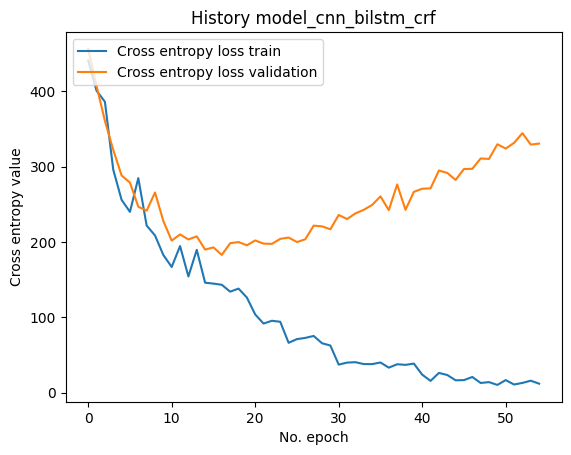

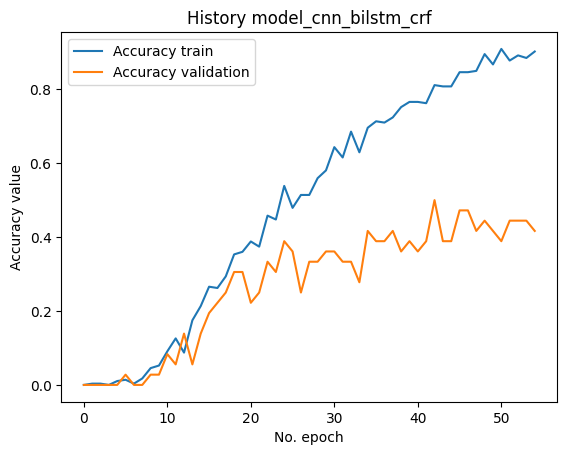

In [7]:
def plot_history(params: dict):
    
    model_name = params['model_name']
    title = f"History {model_name}"
    path = Path(params["model_histories_path"], f"{model_name}_history.json")
    
    history = json.load(path.open())
    print(history.keys())
    
    plt.plot(history['loss'], label='Cross entropy loss train')
    plt.plot(history['val_loss'], label='Cross entropy loss validation')
    plt.title(title)
    plt.ylabel('Cross entropy value')
    plt.xlabel('No. epoch')
    plt.legend(loc="upper left")
    plt.savefig(Path(params["images_path"], f"{model_name}_loss.png"))
    plt.show()
    
    plt.plot(history['acc'], label='Accuracy train')
    plt.plot(history['val_acc'], label='Accuracy validation')
    plt.title(title)
    plt.ylabel('Accuracy value')
    plt.xlabel('No. epoch')
    plt.legend(loc="upper left")
    plt.savefig(Path(params["images_path"], f"{model_name}_acc.png"))
    plt.show()

def plot_history_join(params: dict):
    
    model_name = params['model_name']
    title = f"History {model_name}"
    path = Path(params["model_histories_path"], f"{model_name}_history.json")
    path2 = Path(params["model_histories_path"], f"{model_name}_history2.json")
    
    history = json.load(path.open())
    history2 = json.load(path2.open())
    print(history.keys())
    
    plt.plot(history['loss']+history2['loss'], label='Cross entropy loss train')
    plt.plot(history['val_loss']+history2['val_loss'], label='Cross entropy loss validation')
    plt.title(title)
    plt.ylabel('Cross entropy value')
    plt.xlabel('No. epoch')
    plt.legend(loc="upper left")
    plt.savefig(Path(params["images_path"], f"{model_name}_loss.png"))
    plt.show()
    
    plt.plot(history['acc']+history2['acc'], label='Accuracy train')
    plt.plot(history['val_acc']+history2['val_acc'], label='Accuracy validation')
    plt.title(title)
    plt.ylabel('Accuracy value')
    plt.xlabel('No. epoch')
    plt.legend(loc="upper left")
    plt.savefig(Path(params["images_path"], f"{model_name}_acc.png"))
    plt.show()


plot_history(params)
# plot_history_join(params)


In [6]:
def missmatch(params, model):
    testa_sentences = params['testa_sentences'] 
    testb_sentences = params['testb_sentences']
    unseen_sentences = testa_sentences + testb_sentences
    
    testa_labels = params['testa_labels'] 
    testb_labels = params['testb_labels']
    unseen_labels = testa_labels + testb_labels
    
#     predicted_tags = model(unseen_sentences)
    results = []
    fixed_results = []
    predicted_tags = decode_tags(model, model(unseen_sentences))
    for pred, real in zip(predicted_tags, unseen_labels):
        real = real.split(" ")
        pred = list(filter(lambda x: x, pred))
        fixed = fix_bioes_sequence(pred)
        if len(real) != len(pred):
            print(pred)
            print(real)
        results.append((real, pred))
        fixed_results.append((fixed, pred))
    return results, fixed_results

results, fixed_results = missmatch(params, model)

Wrong tag O at position 90 in window ['O', 'O', 'I']
Wrong tag I at position 91 in window ['O', 'I', 'I']
Wrong tag I at position 91 in window ['O', 'I', 'I'] changed to B
Wrong tag O at position 113 in window ['E', 'O', 'I']
Wrong tag I at position 114 in window ['O', 'I', 'I']
Wrong tag I at position 114 in window ['O', 'I', 'I'] changed to B
Wrong tag E at position 313 in window ['I', 'E', 'I']
Wrong tag I at position 314 in window ['E', 'I', 'I']
Wrong tag I at position 314 in window ['E', 'I', 'I'] changed to B
Wrong tag O at position 225 in window ['O', 'O', 'I']
Wrong tag I at position 226 in window ['O', 'I', 'I']
Wrong tag I at position 226 in window ['O', 'I', 'I'] changed to B
Wrong tag I at position 71 in window ['I', 'I', 'O']
Wrong tag O at position 72 in window ['I', 'O', 'O']
Wrong tag I at position 71 in window ['I', 'I', 'O'] changed to E
Wrong tag O at position 283 in window ['O', 'O', 'I']
Wrong tag I at position 284 in window ['O', 'I', 'I']
Wrong tag I at position

Wrong tag O at position 113 in window ['I', 'O', 'O']
Wrong tag I at position 112 in window ['I', 'I', 'O'] changed to E
Wrong tag O at position 178 in window ['O', 'O', 'I']
Wrong tag I at position 179 in window ['O', 'I', 'I']
Wrong tag I at position 179 in window ['O', 'I', 'I'] changed to B
Wrong tag O at position 308 in window ['O', 'O', 'I']
Wrong tag I at position 309 in window ['O', 'I', 'I']
Wrong tag I at position 309 in window ['O', 'I', 'I'] changed to B
Wrong tag O at position 376 in window ['O', 'O', 'I']
Wrong tag I at position 377 in window ['O', 'I', 'I']
Wrong tag I at position 377 in window ['O', 'I', 'I'] changed to B
Wrong tag O at position 157 in window ['O', 'O', 'I']
Wrong tag I at position 158 in window ['O', 'I', 'I']
Wrong tag I at position 158 in window ['O', 'I', 'I'] changed to B
Wrong tag I at position 179 in window ['I', 'I', 'O']
Wrong tag O at position 180 in window ['I', 'O', 'O']
Wrong tag I at position 179 in window ['I', 'I', 'O'] changed to E
Wron

Accuracy: 0.76460304155191


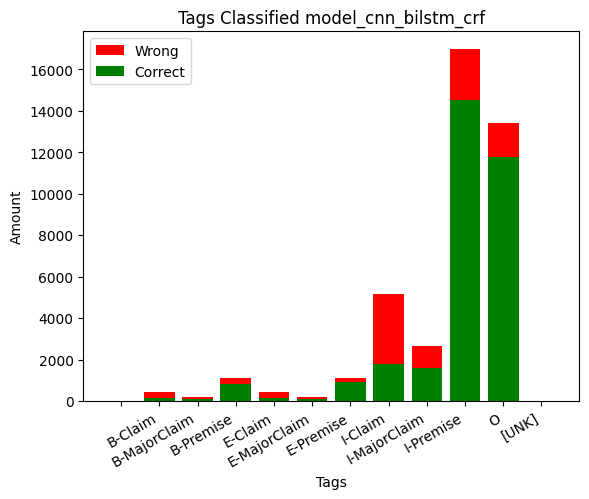

Counter()


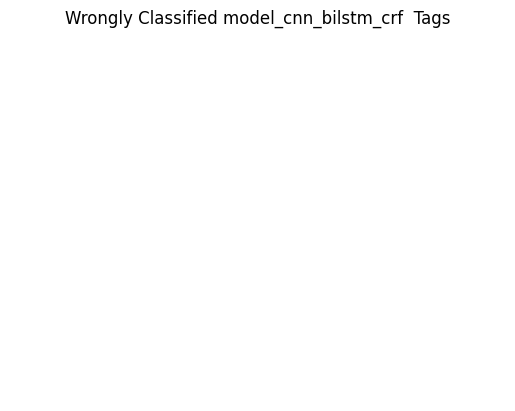

Counter()


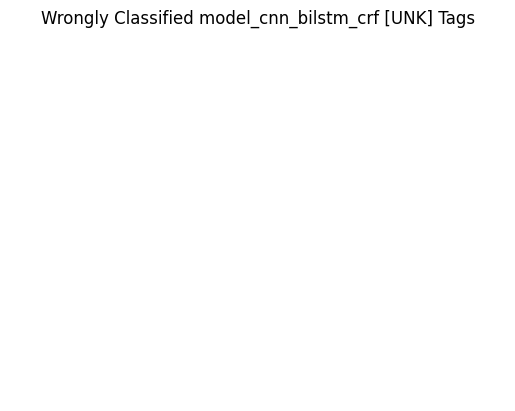

Counter({'I-Claim': 1579, 'O': 659, 'I-MajorClaim': 95, 'B-Premise': 81, 'E-Premise': 36, 'B-Claim': 10, 'E-Claim': 3, 'B-MajorClaim': 1, 'E-MajorClaim': 1})


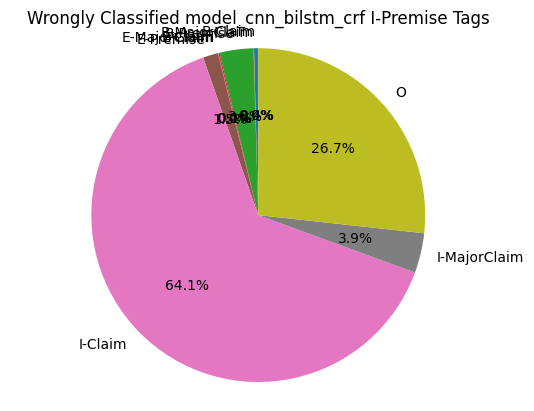

Counter({'I-Premise': 604, 'I-Claim': 523, 'I-MajorClaim': 261, 'B-Premise': 80, 'B-Claim': 44, 'B-MajorClaim': 33, 'E-Claim': 32, 'E-Premise': 32, 'E-MajorClaim': 22})


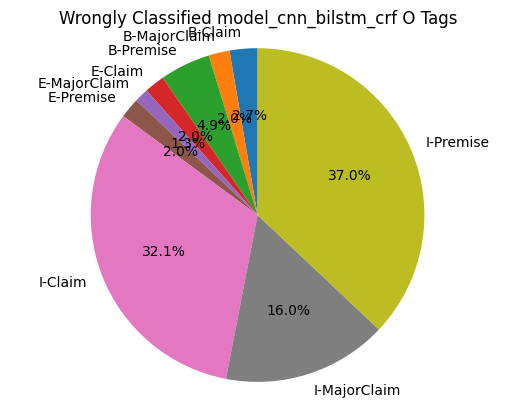

Counter({'I-Premise': 2497, 'O': 502, 'I-MajorClaim': 328, 'B-Claim': 9, 'E-Premise': 5, 'B-Premise': 5, 'E-Claim': 5, 'B-MajorClaim': 5, 'E-MajorClaim': 1})


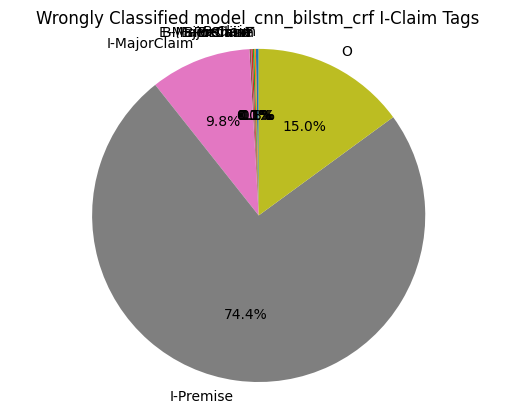

Counter({'O': 431, 'I-Claim': 395, 'I-Premise': 204, 'B-MajorClaim': 9, 'E-MajorClaim': 4, 'B-Premise': 2, 'B-Claim': 1})


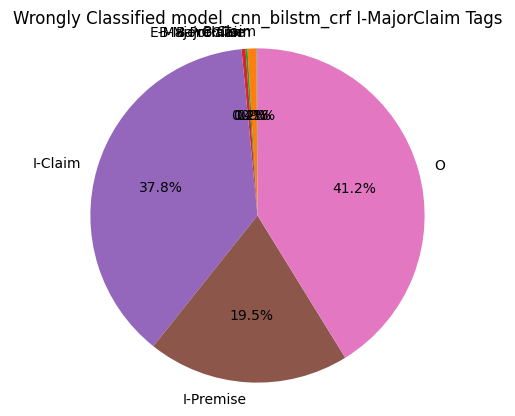

Counter({'E-Claim': 124, 'I-Premise': 54, 'O': 28, 'E-MajorClaim': 11, 'I-Claim': 9})


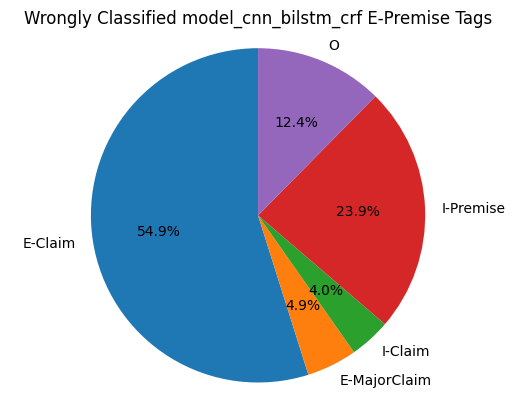

Counter({'O': 122, 'B-Claim': 102, 'I-Premise': 89, 'I-Claim': 11, 'B-MajorClaim': 4, 'I-MajorClaim': 3})


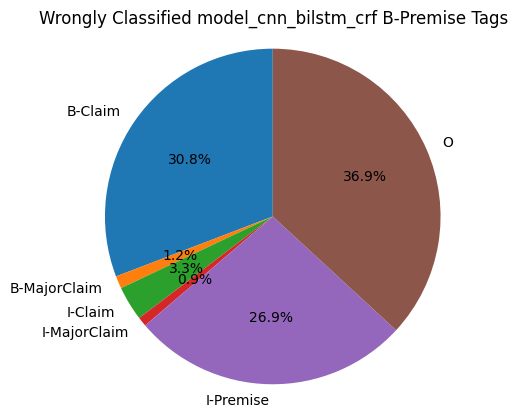

Counter({'E-Premise': 185, 'O': 35, 'E-MajorClaim': 23, 'I-Premise': 12, 'I-Claim': 7, 'I-MajorClaim': 6})


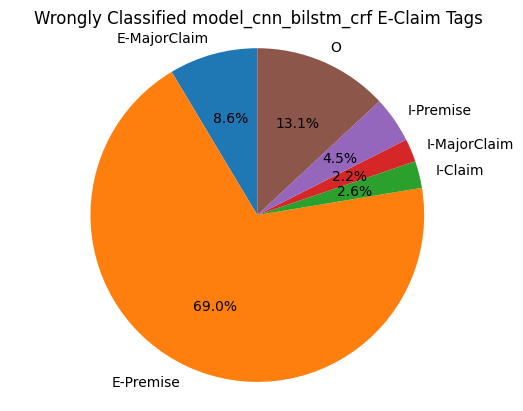

Counter({'B-Premise': 192, 'O': 60, 'I-Premise': 18, 'B-MajorClaim': 14, 'I-Claim': 12, 'I-MajorClaim': 9})


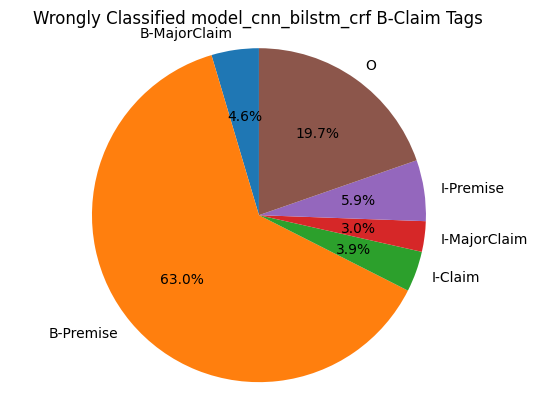

Counter({'O': 33, 'E-Claim': 33, 'E-Premise': 13, 'I-MajorClaim': 10, 'I-Claim': 3, 'I-Premise': 1})


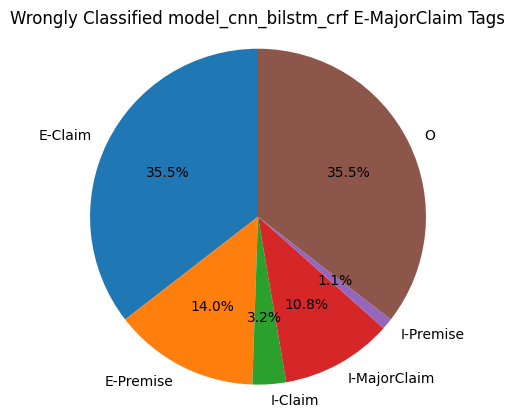

Counter({'O': 53, 'B-Claim': 27, 'B-Premise': 17, 'I-MajorClaim': 9, 'I-Claim': 1})


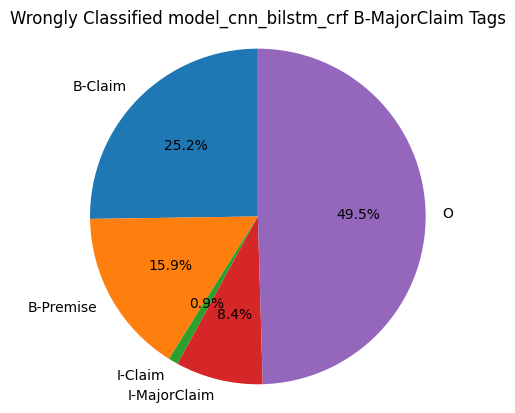

FIXED
Accuracy: 0.9926715363429529


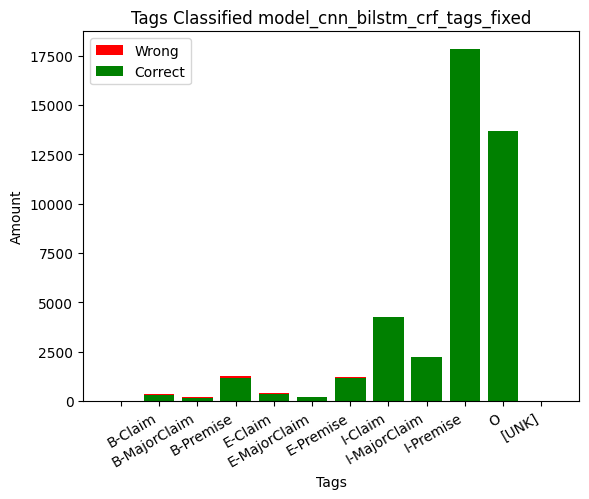

Counter()


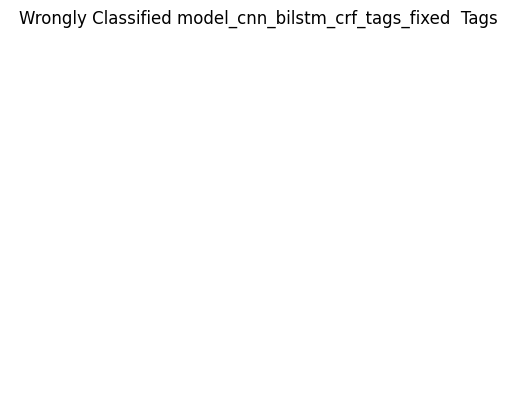

Counter()


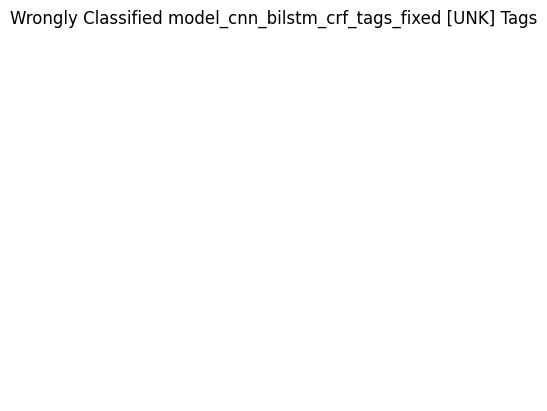

Counter({'B-Premise': 3})


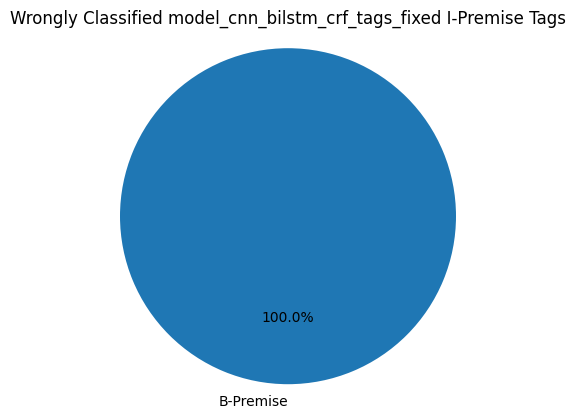

Counter({'E-Premise': 4, 'B-Claim': 1, 'B-Premise': 1})


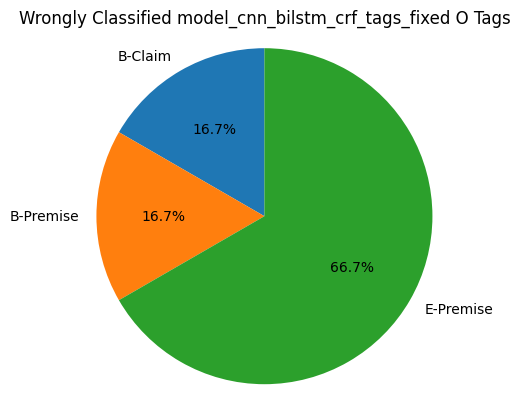

Counter({'B-Claim': 1})


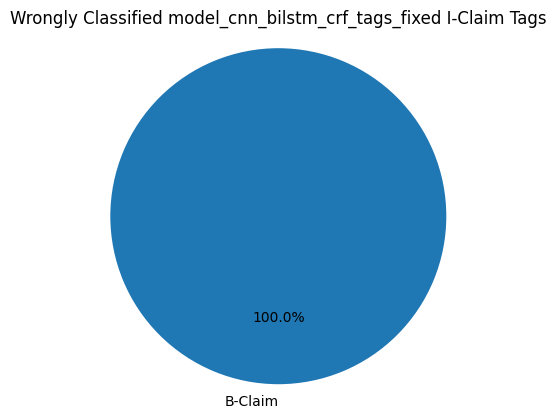

Counter({'B-MajorClaim': 1})


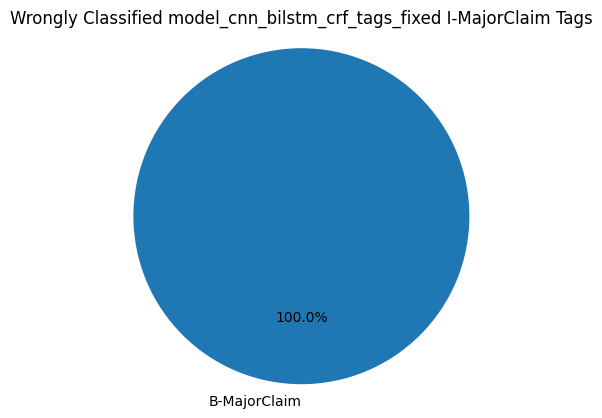

Counter({'I-Premise': 57})


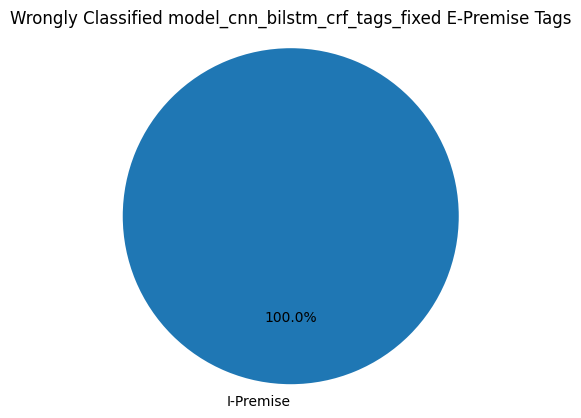

Counter({'I-Premise': 96})


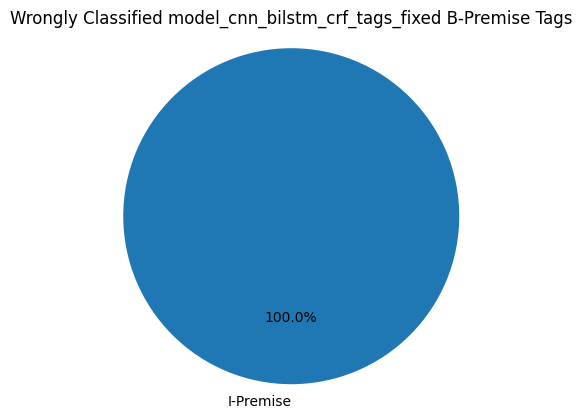

Counter({'I-Claim': 38})


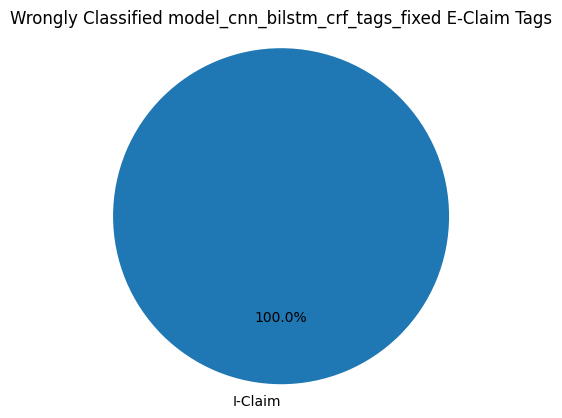

Counter({'I-Claim': 40})


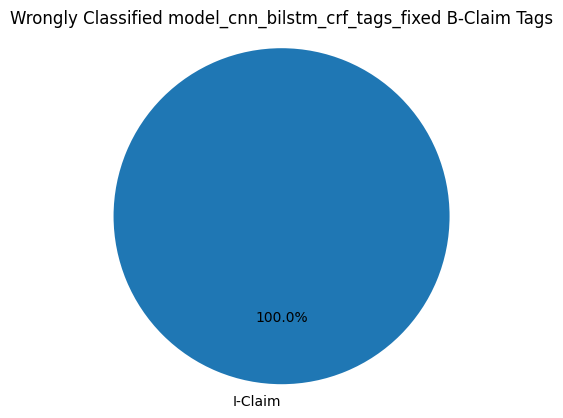

Counter({'I-MajorClaim': 26})


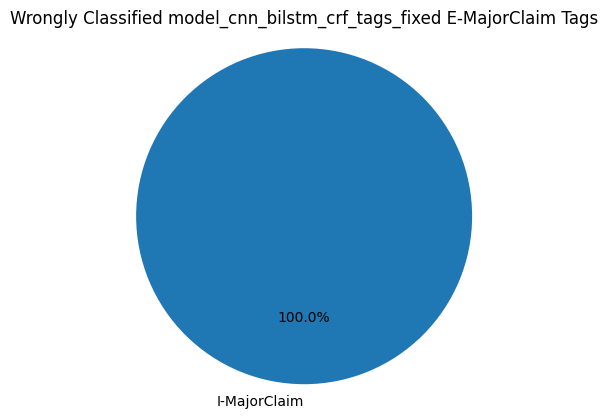

Counter({'I-MajorClaim': 38})


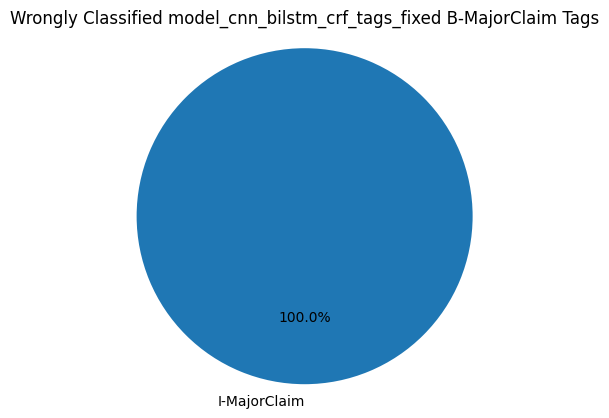

In [10]:

def result_analysis(results, model, with_meta_tags=True, fixed_tags=False):
    tags = model.vectorizer_tags.get_vocabulary()
    
    def get_tag(tag):
        if not tag: return tag
        if with_meta_tags: return tag
        return tag[0]
    
    if not with_meta_tags:
        tags = list(OrderedDict({get_tag(tag):0 for tag in tags}))

    right_predictions = {
        tag: 0 for tag in tags
    }
    wrong_predictions = {
        tag: [] for tag in tags
    }
    total = 0
    correct = 0
    for real, pred in results:
        for real_tag, pred_tag in zip(real, pred):
            if not with_meta_tags:
                real_tag, pred_tag = get_tag(real_tag), get_tag(pred_tag)
            if real_tag != pred_tag:
                wrong_predictions[real_tag].append(pred_tag)
            else:
                right_predictions[real_tag] += 1
                correct += 1
            total += 1

    with_meta_tags_for_title = "" if with_meta_tags else "_only_BIOES"
    fixed_title = "" if not fixed_tags else "_tags_fixed"
    def plot_histogram():
        keys = sorted(list(right_predictions.keys()))
        plt.bar(keys, [right_predictions[key] + len(wrong_predictions[key]) for key in keys], color='r')
        plt.bar(keys, [right_predictions[key] for key in keys], color='g')
        plt.xticks(rotation=30, ha='right')
        plt.xlabel('Tags')
        plt.ylabel('Amount')
        plt.legend(["Wrong", "Correct"],loc=2)
        plt.title(f'Tags Classified {params["model_name"]}{with_meta_tags_for_title}{fixed_title}')
        plt.savefig(Path(params["images_path"], f"histogram_{params['model_name']}{with_meta_tags_for_title}{fixed_title}.png"))
        plt.show()

    def plot_pie_chart(tag):
        predictions = wrong_predictions[tag]
        counted = Counter(predictions)
        keys = sorted(counted.keys())
        
        print(counted)
        
        labels = keys
        sizes = [counted[key] for key in keys]

        fig1, ax1 = plt.subplots()
        ax1.pie(sizes, 
                labels=labels, 
                autopct='%1.1f%%',
                startangle=90)
        ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
        
        plt.title(f'Wrongly Classified {params["model_name"]}{with_meta_tags_for_title}{fixed_title} {tag} Tags')
        plt.savefig(Path(params["images_path"], f"tag_{tag}_{params['model_name']}{with_meta_tags_for_title}{fixed_title}_mistakes.png"))
        plt.show()

    print("Accuracy:", correct/total)
        
    plot_histogram()
        
    for tag in tags:
        plot_pie_chart(tag)
        
result_analysis(results, model)
print("FIXED")
result_analysis(fixed_results, model, fixed_tags=True)

Accuracy: 0.9045383786372889


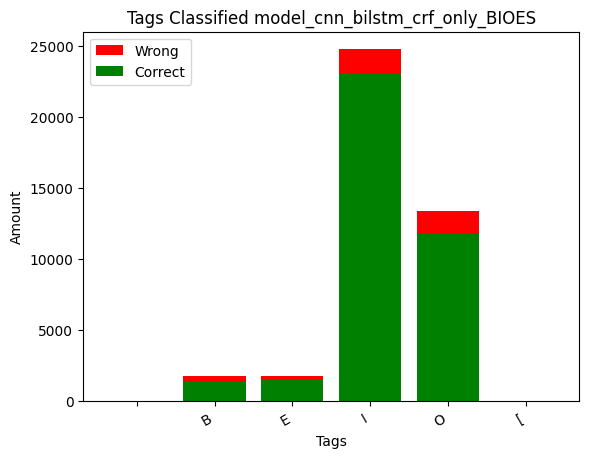

Counter()


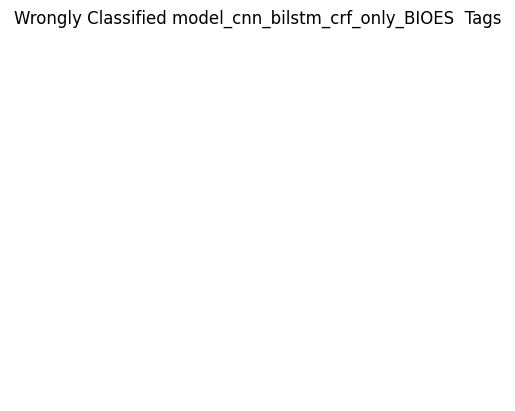

Counter()


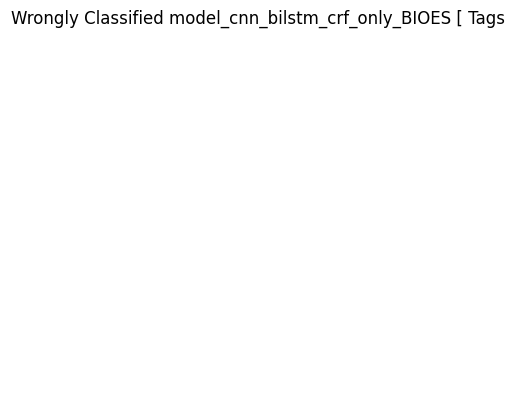

Counter({'O': 1592, 'B': 123, 'E': 55})


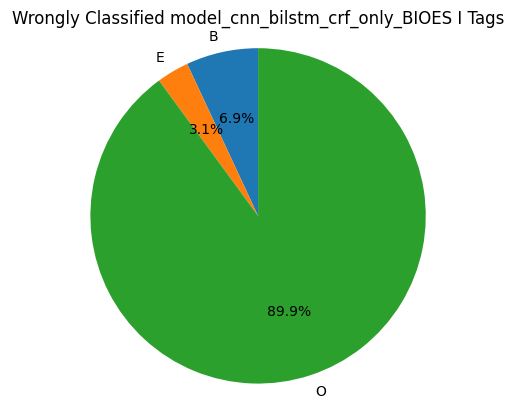

Counter({'I': 1388, 'B': 157, 'E': 86})


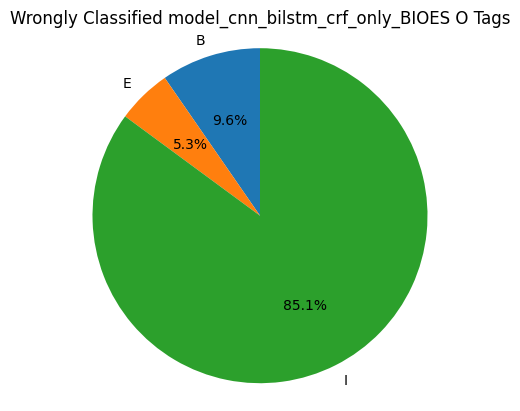

Counter({'I': 102, 'O': 96})


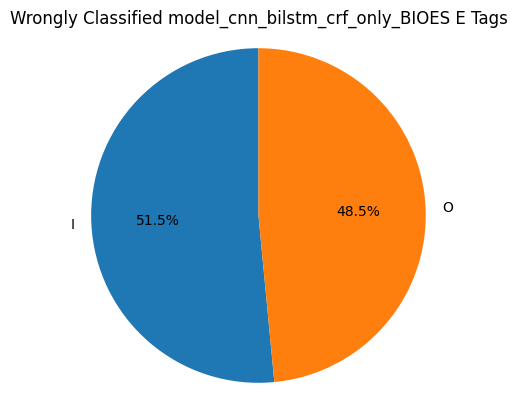

Counter({'O': 235, 'I': 152})


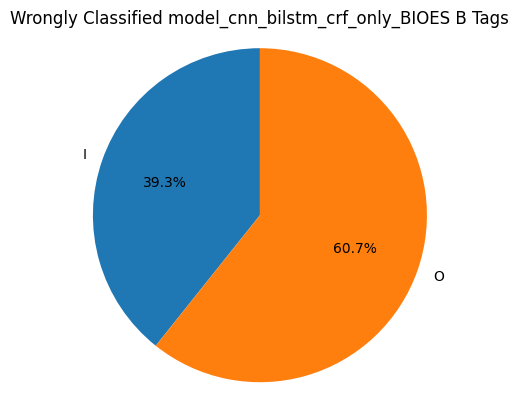

FIXED
Accuracy: 0.9926715363429529


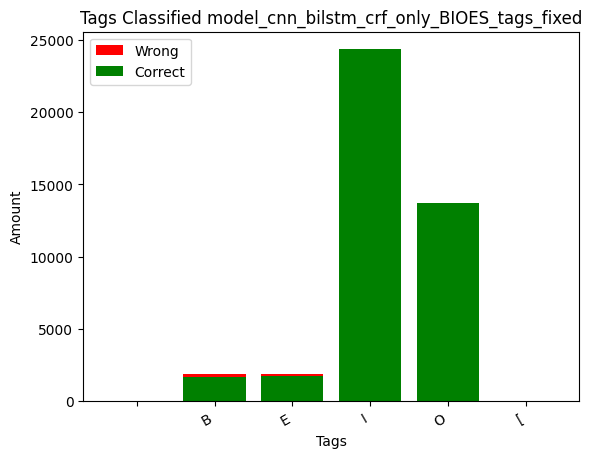

Counter()


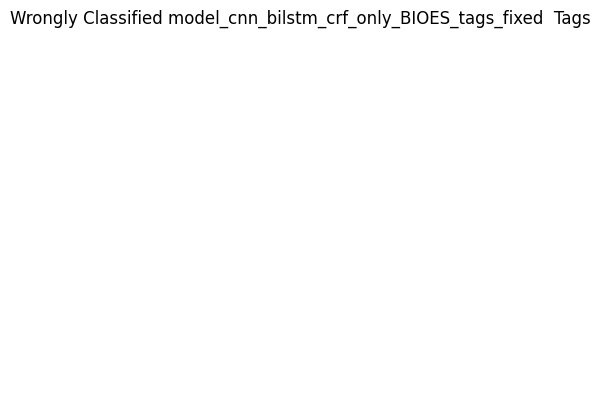

Counter()


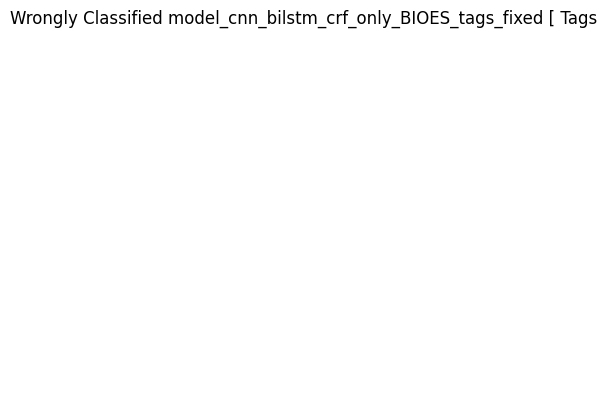

Counter({'B': 5})


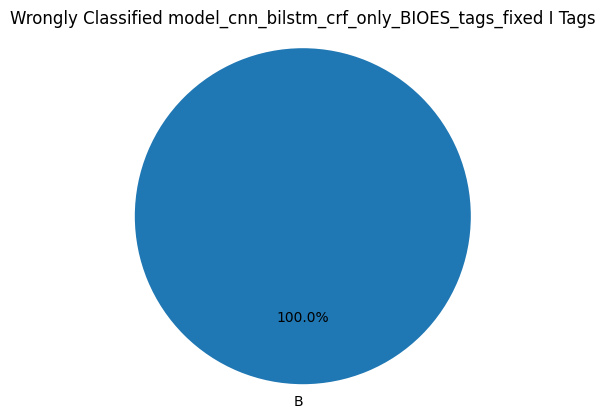

Counter({'E': 4, 'B': 2})


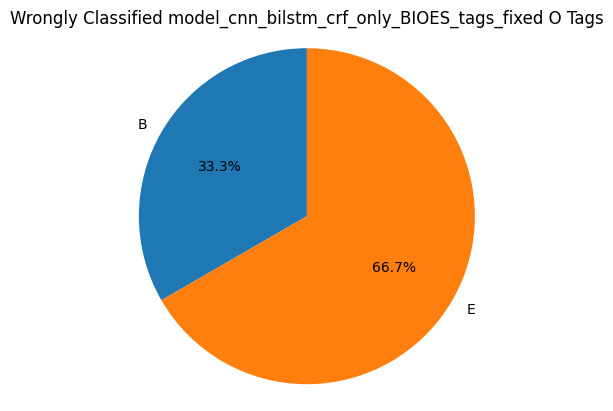

Counter({'I': 121})


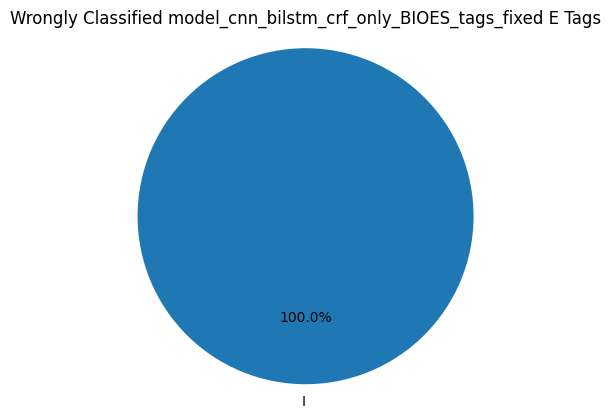

Counter({'I': 174})


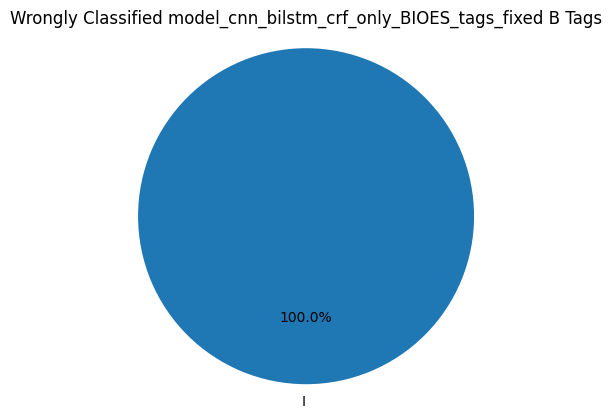

In [11]:
result_analysis(results, model, with_meta_tags=False)
print("FIXED")
result_analysis(fixed_results, model, with_meta_tags=False, fixed_tags=True)

In [12]:
INFO_TAG = "english_paragraph"

DATADIR = Path(f"../../data/segmenter_corpus/{INFO_TAG}_no_meta_tags").resolve()

params = {
#     'model_name': "model_cnn_bilstm_dn_crf",
    'model_name': "model_cnn_bilstm_crf",
#     'model_name': "model_bilstm_dn_crf",
#     'model_name': "model_bilstm_crf",

    'model_cnn_bilstm_crf_path': str(Path(DATADIR, 'model_cnn_bilstm_crf')),
    'model_cnn_bilstm_dn_crf_path': str(Path(DATADIR, 'model_cnn_bilstm_dn_crf')),
    'model_bilstm_crf_path': str(Path(DATADIR, 'model_bilstm_crf')),
    'model_bilstm_dn_crf_path': str(Path(DATADIR, 'model_bilstm_dn_crf')),
    'full_model_cnn_bilstm_crf_path': str(Path(DATADIR, 'full_model_cnn_bilstm_crf')),
    'full_model_cnn_bilstm_dn_crf_path': str(Path(DATADIR, 'full_model_cnn_bilstm_dn_crf')),
    'full_model_bilstm_crf_path': str(Path(DATADIR, 'full_model_bilstm_crf')),
    'full_model_bilstm_dn_crf_path': str(Path(DATADIR, 'full_model_bilstm_dn_crf')),
    'model_histories_path': str(Path(DATADIR)),
    'images_path': str(Path(DATADIR, "images")),
    'words_path': str(Path(DATADIR, 'vocab.words.txt')),
    'chars_path': str(Path(DATADIR, 'vocab.chars.txt')),
    'tags_path': str(Path(DATADIR, 'vocab.tags.txt')),
    'sentences_path': (str(Path(DATADIR, 'train.words.txt')), str(Path(DATADIR, 'testa.words.txt')), str(Path(DATADIR, 'testb.words.txt'))),
    'labels_path': (str(Path(DATADIR, 'train.tags.txt')), str(Path(DATADIR, 'testa.tags.txt')), str(Path(DATADIR, 'testb.tags.txt'))),
}

In [13]:
load_dataset_string(params)


Train sentences 286
Test sentences 80
Dev sentences 36


In [14]:
model = keras.models.load_model(params[f"full_{params['model_name']}_path"])

In [15]:
plot_history(params)


NameError: name 'plot_history' is not defined

In [16]:
results, fixed_results = missmatch(params, model)

Wrong tag O at position 47 in window ['O', 'O', 'I']
Wrong tag I at position 48 in window ['O', 'I', 'I']
Wrong tag I at position 48 in window ['O', 'I', 'I'] changed to B
Wrong tag I at position 65 in window ['B', 'I', 'O']
Wrong tag O at position 66 in window ['I', 'O', 'O']
Wrong tag I at position 65 in window ['B', 'I', 'O'] changed to E
Wrong tag I at position 89 in window ['I', 'I', 'O']
Wrong tag O at position 90 in window ['I', 'O', 'O']
Wrong tag I at position 89 in window ['I', 'I', 'O'] changed to E
Wrong tag O at position 176 in window ['O', 'O', 'I']
Wrong tag I at position 177 in window ['O', 'I', 'O']
Wrong tag I at position 177 in window ['O', 'I', 'O'] changed to O
Wrong tag B at position 192 in window ['O', 'B', 'B']
Wrong tag B at position 193 in window ['B', 'B', 'I']
Wrong tag B at position 193 in window ['B', 'B', 'I'] changed to I
Wrong tag I at position 309 in window ['I', 'I', 'O']
Wrong tag O at position 310 in window ['I', 'O', 'B']
Wrong tag I at position 30

Wrong tag I at position 351 in window ['O', 'I', 'I'] changed to B
Wrong tag O at position 44 in window ['O', 'O', 'I']
Wrong tag I at position 45 in window ['O', 'I', 'I']
Wrong tag I at position 45 in window ['O', 'I', 'I'] changed to B
Wrong tag I at position 49 in window ['I', 'I', 'O']
Wrong tag O at position 50 in window ['I', 'O', 'O']
Wrong tag I at position 49 in window ['I', 'I', 'O'] changed to E
Wrong tag O at position 51 in window ['O', 'O', 'I']
Wrong tag I at position 52 in window ['O', 'I', 'I']
Wrong tag I at position 52 in window ['O', 'I', 'I'] changed to B
Wrong tag O at position 64 in window ['O', 'O', 'I']
Wrong tag I at position 65 in window ['O', 'I', 'I']
Wrong tag I at position 65 in window ['O', 'I', 'I'] changed to B
Wrong tag O at position 96 in window ['O', 'O', 'I']
Wrong tag I at position 97 in window ['O', 'I', 'I']
Wrong tag I at position 97 in window ['O', 'I', 'I'] changed to B
Wrong tag O at position 238 in window ['O', 'O', 'I']
Wrong tag I at posi

Accuracy: 0.9020955574182733


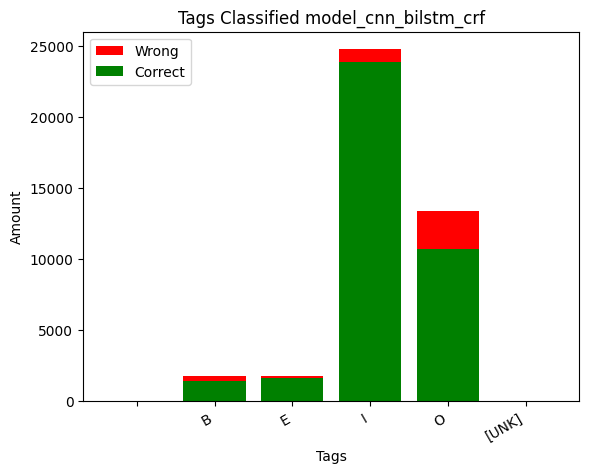

Counter()


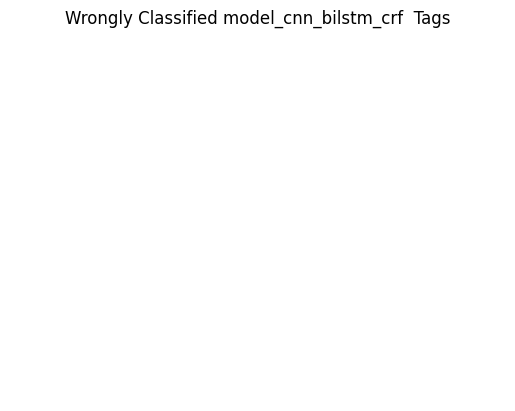

Counter()


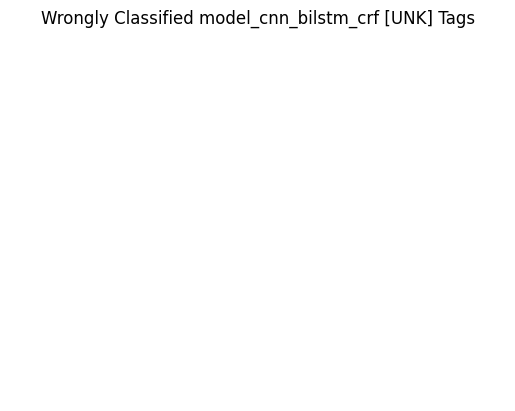

Counter({'O': 752, 'B': 76, 'E': 62})


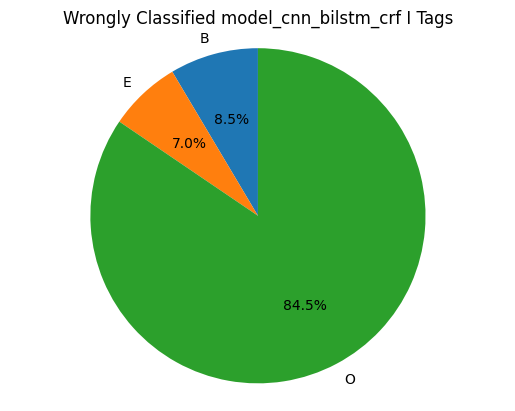

Counter({'I': 2310, 'B': 225, 'E': 153})


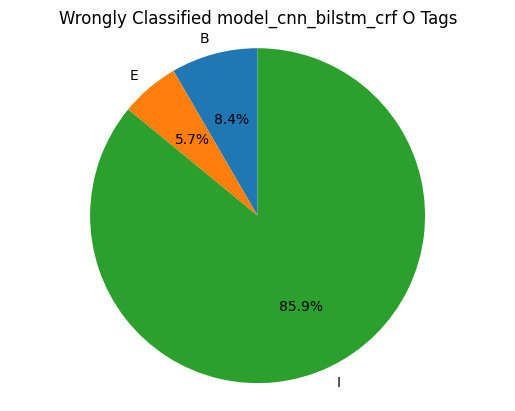

Counter({'I': 102, 'O': 43})


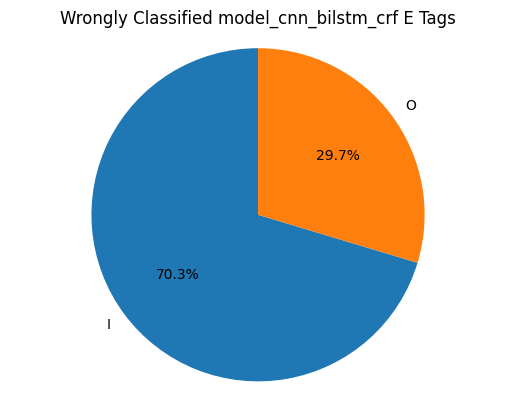

Counter({'I': 232, 'O': 133})


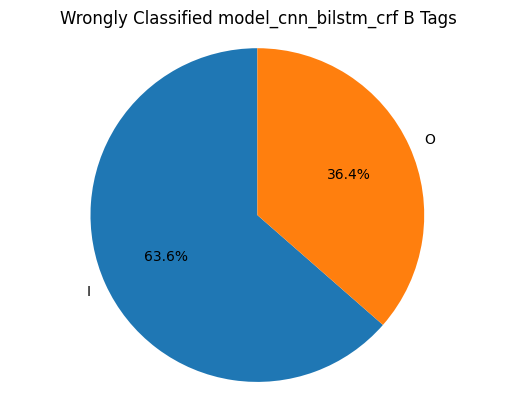

FIXED
Accuracy: 0.9871392647587115


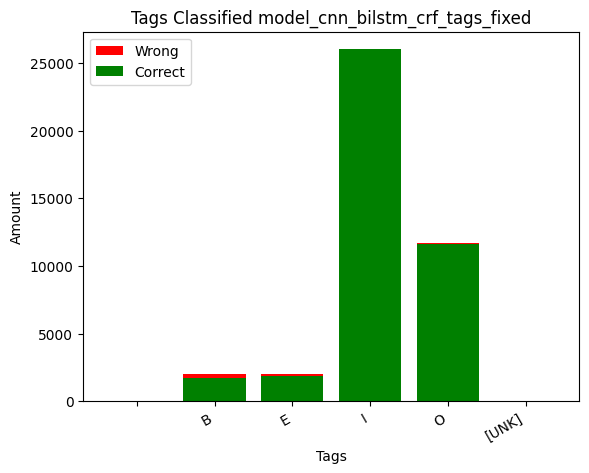

Counter()


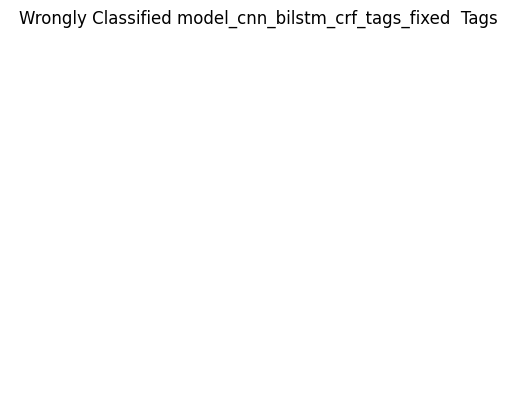

Counter()


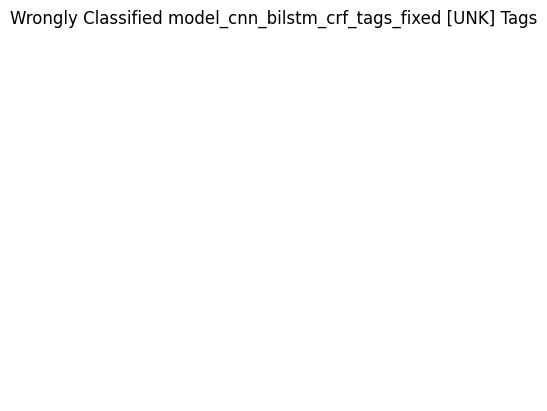

Counter({'B': 4})


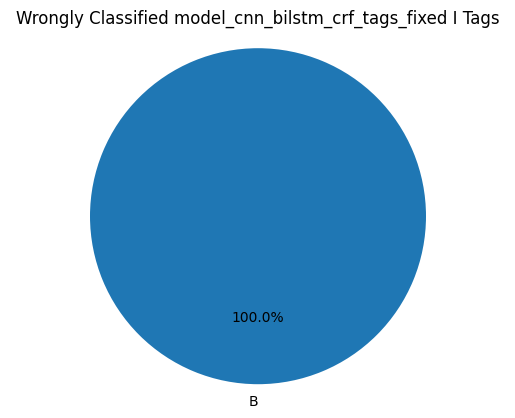

Counter({'I': 41, 'E': 6, 'B': 5})


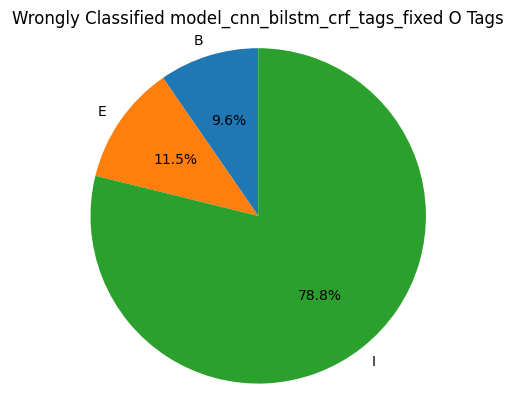

Counter({'I': 173})


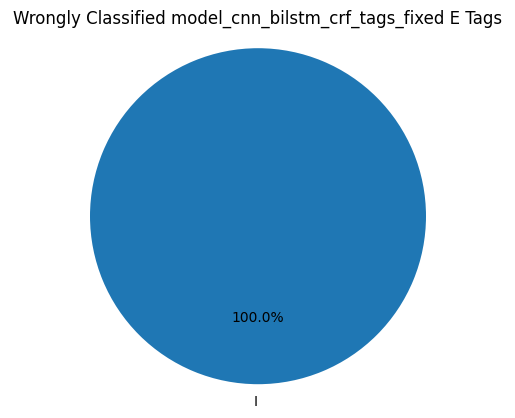

Counter({'I': 308})


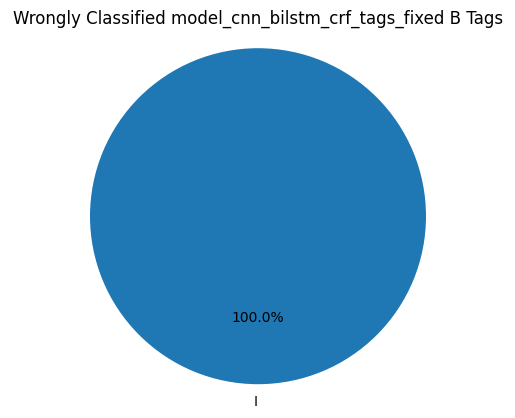

In [17]:
result_analysis(results, model)
print("FIXED")
result_analysis(fixed_results, model, fixed_tags=True)

In [33]:
acc = tf.metrics.Accuracy()
encode = {
    "O":1,
    "B":2,
    "I":3,
    "E":4,
}
def missmatch(params, model):
    testa_sentences = params['testa_sentences'] 
    testb_sentences = params['testb_sentences']
    unseen_sentences = testa_sentences# + testb_sentences
    
    testa_labels = params['testa_labels'] 
    testb_labels = params['testb_labels']
    unseen_labels = testa_labels# + testb_labels
    
#     predicted_tags = model(unseen_sentences)
    results = []
    predicted_tags = decode_tags(model, model(unseen_sentences))
    for pred, real in zip(predicted_tags, unseen_labels):
        real = real.split(" ")
        pred = list(filter(lambda x: x, pred))
        if len(real) != len(pred):
            print(pred)
            print(real)
        results.append((real, pred))
    return results
results = missmatch(params, model)
# init = len(results[0][1])
for x,y in results:
#     if len(x) != init or len(y) != init:
#         print(init)
#         print(len(x), x)
#         print(len(y), y)
#         break
    x,y = [encode[t] for t in x], [encode[t] for t in y]
    acc.update_state(x,y)
acc.result().numpy()

0.9036875